# Time Series Forecasting with ARIMA

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

### Data

In [8]:
# examine shape of dataframe, variable types
print (data.shape)
print (data.dtypes)     

(19735, 28)
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


In [51]:
data = pd.read_csv('./data/data.csv', index_col=0) 
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
# any missing values?
data.isnull().values.any()

False

### Exploratory Data Analysis

working


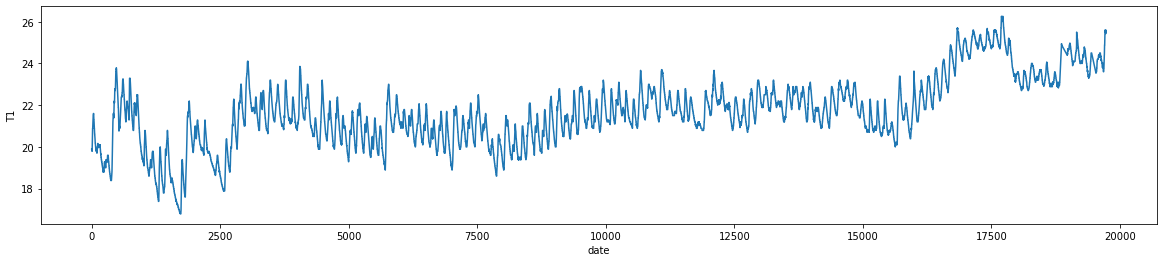

In [52]:
# plot car count over all years
plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('date')
ax.set_ylabel('T1')
plt.plot(data.index, data['T1']);
print("working")

Initial thoughts on data: there's a strong trend throughout the data, with extreme fluctuations. Will need to look closer at the data using a shorter time frame to see why car count could as low as 0-5 on some days. I don't see any annual seasonal trends.

In [13]:
# # car count for 2015
# start = datetime.datetime(2015,1,1)
# end = datetime.datetime(2016,1,1)

# plt.figure(figsize=(20,4))
# ax = plt.gca()
# ax.set_xlim(start, end)
# ax.set_xlabel('Year')
# ax.set_ylabel('Car Count')
# plt.plot(data.index, data['car.count']);     


More initial thoughts: why is there so much variation? What are the sudden dips in data? Is it connected to weather and how cold/how much it rains? Probably not, people need to shop. Is it connected to how cloudy the aerial footage may be and the reliability of our data?

### Cloud Indicator Variable

In [ ]:
# # let's take a closer look: summer 2015
# start = datetime.datetime(2015,3,1)
# end = datetime.datetime(2015,7,1)

# cloudy_data = data.loc[(data['cloud.indicator'] == 'cloudy')]
# clear_data = data.loc[(data['cloud.indicator'] == 'clear')]

# plt.figure(figsize=(20,4))
# ax = plt.gca()
# ax.set_xlim(start, end)
# ax.set_ylim(0, 250)
# ax.set_ylabel('Car Count')
# plt.scatter(clear_data.index, clear_data['car.count'])  
# plt.scatter(cloudy_data.index, cloudy_data['car.count'], color='r');     
# ax.legend(['Clear Day', 'Cloudy Day'])


Using a scatterplot, I can see the individual daily car counts. All the days with very low car count are from cloudy days, when the aerial image is probably difficult to read. I would consider all the data from cloudy days as corrupt or to contain some degree of unreliability. 

### Outliers

In [ ]:
# # plot outliers by year
# data_boxplot = []
# for year in range(2010, 2017):
#     data_boxplot.append(clear_data.loc[(clear_data.index.year == year)]['car.count'])
    
# import seaborn as sns
# plt.figure(figsize=(8,5))
# ax = plt.gca()
# sns.boxplot(data=data_boxplot, color='w', whis=1.5)
# ax.set_xlabel('Year')
# ax.set_ylabel('Car Count for Clear Days Only');
# # plt.boxplot(data_boxplot, whis=1.5, showfliers=True);   
# # use seaborn over matplotlib since matplotlib is not showing outliers, annoyingly

Outlier analysis: if we keep all of the data (including from cloudy days), this will produce a misleading IQR, one much larger than the actual. For outlier analysis, let's remove all the data from cloudy days.

In [ ]:
# TODO remove outlier data from dataset

### Weather Variable

In [ ]:
# # frequency of Weather Indicator
# plt.figure(figsize=(6,5))
# ax = plt.gca()
# ax.set_xlim(-4, 5)
# plt.hist(clear_data['weather'], bins=60)
# plt.hist(cloudy_data['weather'], bins=60)
# ax.set_ylabel('Frequency of Weather Values')
# ax.set_xlabel('Weather')
# ax.legend(['Clear Day', 'Cloudy Day']);

Weather indicator doesn't appear to be well correlated with car count. 

Some ideas:
* Clear days are more likely to have a lower absolute value for weather. 
* Weather could be normalized temperature (easily verified by plotting over a year) 

In [ ]:
# # seasonal trends for weather
# start = datetime.datetime(2015,1,1)
# end = datetime.datetime(2016,1,1)

# plt.figure(figsize=(20,4))
# ax = plt.gca()
# ax.set_xlim(start, end)
# ax.set_ylabel('Weather')
# plt.scatter(clear_data.index, clear_data['weather'])  
# plt.scatter(cloudy_data.index, cloudy_data['weather'], color='r')     
# ax.legend(['Clear Day', 'Cloudy Day']);



There is no obvious correlation between weather and temperature.




### Day of Week

In [ ]:
# # TODO label properly x-axis
# day = data['day.of.week'].unique()
# plt.figure(figsize=(10,4))
# ax = plt.gca()
# plt.bar(np.arange(0,len(day)), data.groupby('day.of.week').sum()['car.count'])
# ax.set_ylim(36000, 41000)
# ax.set_xlabel('Day of Week')
# ax.set_ylabel('Total Car Count')

There is a day of week signal, could be an important feature to model on.

## Forecasting

Given this data is a timeseries with a decent amount of past values, let's use an ARIMA model for fitting and forecasting efforts. Unfortunately, I did not find the weather variable very useful and the cloud indicator simply helped throw out faulty data. The only other information is the time component, which will be used in the ARIMA model. 

To use ARIMA, I need to first ensure the data is stationary (time, variance, co-variance should not be dependent on time). I'll use the Dickey-Fuller Test Statitic (which statsmodel library includes already).

### Stationarity

In [53]:
def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print (df_results)

In [54]:
test_stationarity(data['T1'])


Test Statistic         -5.737394e+00
p-value                 6.391284e-07
Lags                    4.500000e+01
Observations            1.968900e+04
Critical Value (1%)    -3.430682e+00
Critical Value (5%)    -2.861687e+00
Critical Value (10%)   -2.566848e+00
dtype: float64


Car count data is not stationary (test statistic is greater than critical value). Needs some transformations. 

In [55]:
# first difference
data['diff'] = data['T1'] - data['T1'].shift(1)  
test_stationarity(data['diff'].dropna(inplace=False))

#TODO: address warning 

Test Statistic            -22.037629
p-value                     0.000000
Lags                       44.000000
Observations            19689.000000
Critical Value (1%)        -3.430682
Critical Value (5%)        -2.861687
Critical Value (10%)       -2.566848
dtype: float64


First difference has made the data stationary (test statistic sig. less than critical value so we can reject null ho).

### ACF and PACF Graphs

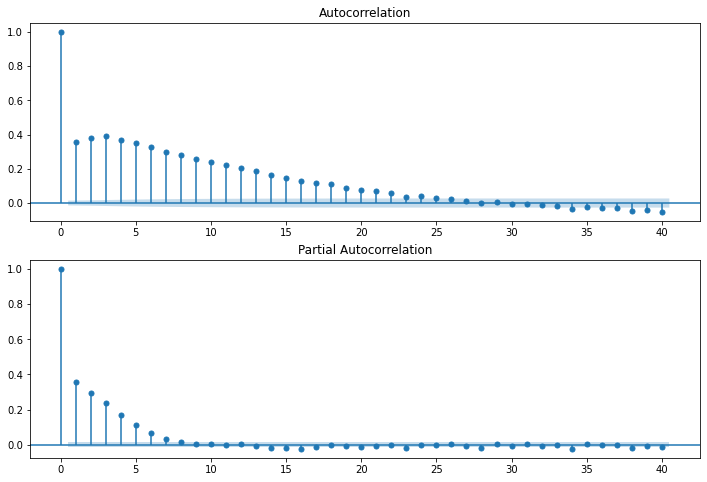

In [43]:
# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['diff'][1:], lags=40, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['diff'][1:], lags=40, ax=ax2)

It looks like the ACF is lagged by 1 and that PACF is geometric.



In [56]:
data['T1.float'] = data['T1'].astype(float)
# convert int to float for ARIMA model input
# TODO: do this in a cleaner way

In [57]:
print (type(data['T1.float'][5]))
print(data['T1.float'][5])

<class 'numpy.float64'>
19.89


### Fitting Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:               T1.float   No. Observations:                19735
Model:                     ARMA(1, 0)   Log Likelihood               31583.117
Method:                       css-mle   S.D. of innovations              0.049
Date:                Wed, 09 Feb 2022   AIC                         -63160.235
Time:                        19:03:22   BIC                         -63136.564
Sample:                             0   HQIC                        -63152.485
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.9105      0.870     25.196      0.000      20.206      23.615
ar.L1.T1.float     0.9996      0.000   5039.042      0.000       0.999       1.000
                                    

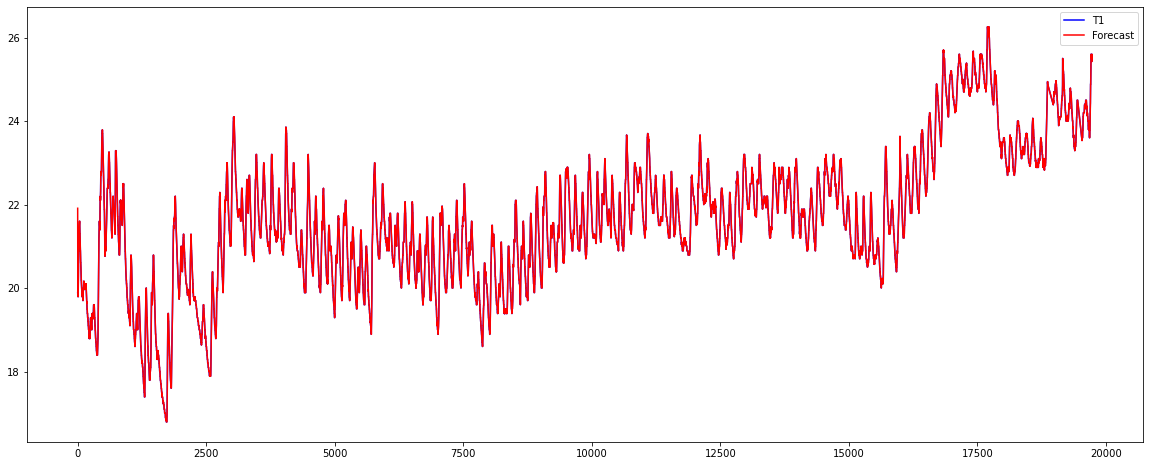

In [60]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data['T1.float'], order=(1,0,0)) 
ax = plt.gca()
results = model.fit() 
print(results)
plt.plot(data['T1'], color='blue')
plt.plot(results.fittedvalues, color='red')
ax.legend(['T1', 'Forecast'])

print (results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:               T1.float   No. Observations:                19735
Model:                     ARMA(1, 1)   Log Likelihood               32451.403
Method:                       css-mle   S.D. of innovations              0.047
Date:                Wed, 09 Feb 2022   AIC                         -64894.806
Time:                        19:04:11   BIC                         -64863.246
Sample:                             0   HQIC                        -64884.474
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.8451      0.702     31.109      0.000      20.469      23.221
ar.L1.T1.float     0.9995      0.000   4089.157      0.000       0.999       1.000
ma.L1.T1.float     0.2453      0.006

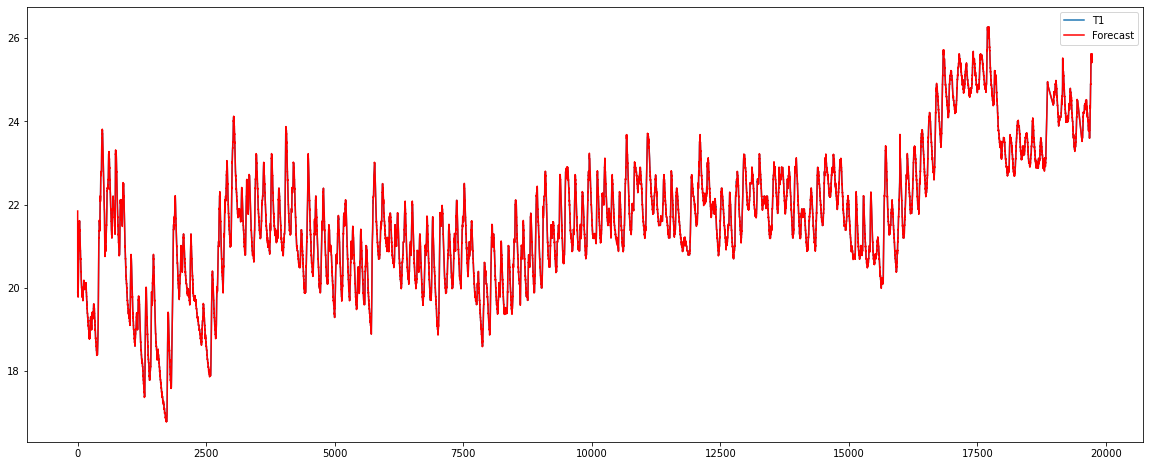

In [62]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data['T1.float'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(data['T1'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['T1', 'Forecast'])

print (results.summary())

### Forecasting Model

19734    25.497219
19735    25.498696
19736    25.496710
dtype: float64


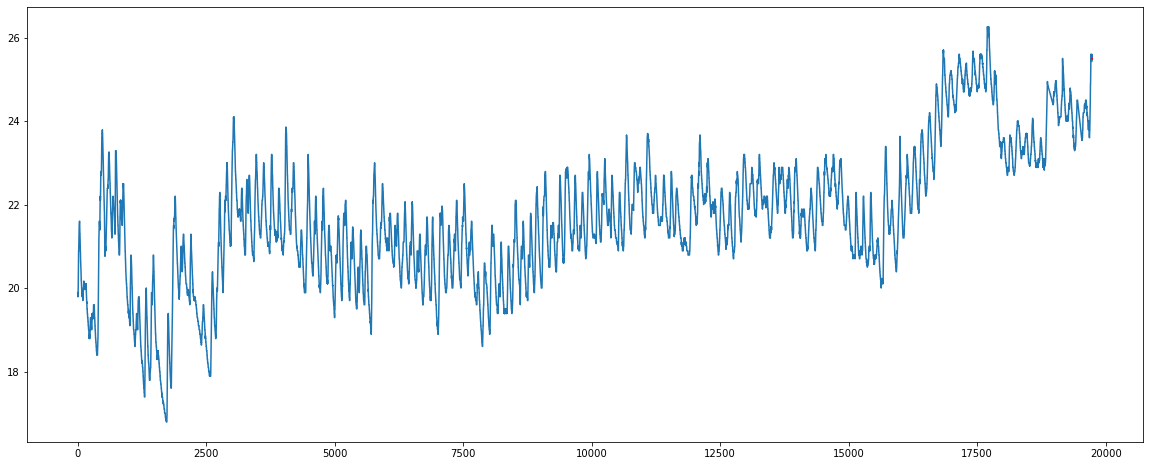

In [71]:
# forecast quick and dirty
# TODO: clean this up
fig = plt.figure(figsize=(20,8))
num_points = len(data['T1'])
x = results.predict(start=(19734), end=(19736), dynamic=False)
print(x)

plt.plot(data['T1'][:19735])
plt.plot(x, color='r')

## Summary
The ARIMA(1,0,0) tends to capture the average of the overall trend, underpredicting during years of higher car count and overpredicting during years of lower car count. The trends from the earlier years cause the forecast prediction to be high. The ARIMA(1,0,1) does better with overall trend but does not do so great with the variability and noise.

Next steps if I had more time:
1. Trend from the past years (2015-2016) are more relevant than the trends from early years (2010-2012). I'd like to try and fit the ARIMA model to only the data from the past few years for forecasting the next year or two. 
2. I'd like to revisit the weather feature in case there is some correlation between it and car count
3. It would be interesting to see if the missing data from the cloudy days could be filled in with some extension techniques for stronger predictions.
4. There is a temporal signal on days of week that I would further investigate. It's possible with a few features like weather, day of week, and year, a more sophisticated algorithm could be trained to better predict car count.
5. I'd like to look closer at detecting the AR & MA (orders for ARIMA model) using ACF and PACF plots and evaluating the model fits - looking at likelihood function, sum of squares, etc.
6. Lastly, it would always be good to get more business context. For example, is there any indication that the downward trend from 2013 onward would continue? Has another Wal-mart been constructed 10 miles away in the year 2013 to compete with this one? Perhaps a shopping mall on the north side of town was constructed and the housing prices have started plummeting as home owners start moving to the north side of town? 